In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/91964/Desktop/dataset/titanic.csv',
                usecols=['Sex','Embarked','Pclass','Age','Survived','Fare'])
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


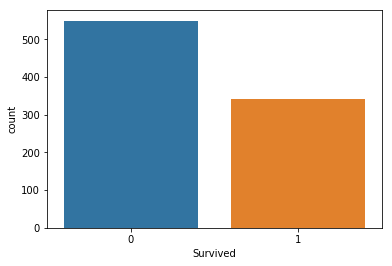

In [3]:
sns.countplot(x='Survived',data=data)
plt.show()

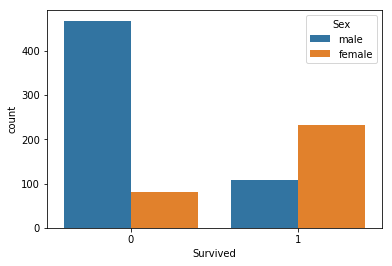

In [4]:
sns.countplot(x='Survived',hue='Sex',data=data)
plt.show()

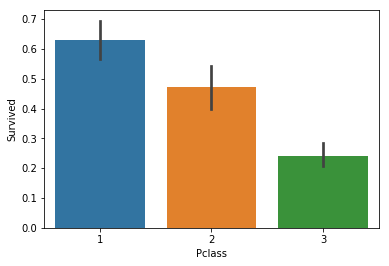

In [5]:
sns.barplot(x='Pclass',y='Survived',data=data)
plt.show()

In [6]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [7]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

In [8]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
5,0,3,male,24.0,8.4583,Q
6,0,1,male,54.0,51.8625,S
7,0,3,male,2.0,21.0750,S
8,1,3,female,27.0,11.1333,S
9,1,2,female,14.0,30.0708,C


In [9]:
mc_value='S'
for i in data:
    data['Embarked']=data['Embarked'].fillna(mc_value)

In [10]:
data.isnull().mean()

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [11]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,1


In [12]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [14]:
x

array([[ 0.82737724, -0.53383369, -0.50244517,  0.73769513, -0.30756234,
         0.61583843],
       [-1.56610693,  0.67489052,  0.78684529, -1.35557354, -0.30756234,
        -1.62380254],
       [ 0.82737724, -0.23165264, -0.48885426, -1.35557354, -0.30756234,
         0.61583843],
       ...,
       [ 0.82737724, -0.38274316, -0.17626324, -1.35557354, -0.30756234,
         0.61583843],
       [-1.56610693, -0.23165264, -0.04438104,  0.73769513, -0.30756234,
        -1.62380254],
       [ 0.82737724,  0.22161894, -0.49237783,  0.73769513,  3.25137334,
        -1.62380254]])

In [15]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [17]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(C=100,random_state=50)
logmodel.fit(x_train,y_train)

LogisticRegression(C=100, random_state=50)

In [18]:
y_pred=logmodel.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [19]:
print('Wrong predictions out of total:')
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()+(y_test!=y_pred).sum()))

Wrong predictions out of total:
51 / 268


In [20]:
from sklearn.metrics import accuracy_score
print('Percentage Accuracy:',100*accuracy_score(y_test,y_pred))

Percentage Accuracy: 80.97014925373134


In [21]:
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(y_test,y_pred)
c_m

array([[143,  19],
       [ 32,  74]], dtype=int64)

In [22]:
np.where(y_pred!=y_test)

(array([  1,   5,  19,  27,  33,  43,  55,  60,  62,  67,  74,  75,  84,
         86,  91, 103, 104, 111, 116, 118, 123, 130, 133, 142, 145, 146,
        148, 151, 153, 156, 159, 163, 166, 168, 173, 179, 185, 205, 210,
        218, 220, 226, 230, 240, 242, 243, 244, 251, 256, 257, 259],
       dtype=int64),)

In [23]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [24]:
kf=KFold(5,shuffle=True)
print(cross_val_score(LogisticRegression(),
                      x,y,cv=kf,scoring='accuracy').mean())

0.7867867679367271


In [25]:
kf=KFold(5,shuffle=True)
print(cross_val_score(KNeighborsClassifier(),
                      x,y,cv=kf,scoring='accuracy').mean())

0.7912497646098802


In [26]:
kf=KFold(5,shuffle=True)
print(cross_val_score(LinearSVC(),
                      x,y,cv=kf,scoring='accuracy').mean())

0.7979725064339966


In [27]:
from sklearn.tree import DecisionTreeClassifier
kf=KFold(5,shuffle=True)
print(cross_val_score(DecisionTreeClassifier(),
                      x,y,cv=kf,scoring='accuracy').mean())

0.7744460485845208


In [28]:
from sklearn.ensemble import RandomForestClassifier
kf=KFold(5,shuffle=True)
print(cross_val_score(RandomForestClassifier(),
                          x,y,cv=kf,scoring='accuracy').mean())

0.8181658401858012
